##### Austin Hancock

## MSDS 7337 - Section 401
## Homework - Week 2
[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

### Table of Contents
* [Description](#Description)
* [Tools](#Tools)
* [Question-1](#Question-1)
* [Question-2](#Question-2)
* [Question-3](#Question-3)

### <a name="Description"></a>Description
For the week-2 assignment I will be addressing the following:

    - Create a scoring method for the vocabulary size of a text
    - Create a scoring method for the long-word vocabulary size of a text
    - Create a text-difficulty score
    
##### NOTE:
There is a text within the corpus that is in French. Due to a constraint that all of the Gutenberg texts must be used for the corpus, this text is not removed in the below analysis. If we were not required to use all of the texts I would have seperated this text from the others during my exploratory analysis.

### <a name="Tools"></a>Tools

In [273]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import nltk; print("NLTK", nltk.__version__)
import matplotlib; print("Matplotlib", matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np; print("Numpy", np.__version__)
import bs4; print("bs4", bs4.__version__)
from bs4 import BeautifulSoup
import re; print("re", re.__version__)
import math
import pandas as pd; print("pandas", pd.__version__)

Windows-10-10.0.17134-SP0
Python 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
NLTK 3.2.4
Matplotlib 2.1.0
Numpy 1.13.3
bs4 4.6.0
re 2.2.1
pandas 0.20.3


### <a name="Question-1"></a>Question-1

In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

In [10]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [11]:
from urllib import request
from nltk import word_tokenize
from nltk import FreqDist

I begin by reading in the three texts I will be performing my analysis on.

    - The Beacon Second Reader (2nd Grade)
    - The Literary World Seventh Reader (7th Grade)
    - The Ontario High School Reader (High School)
    
Below, I am reading the text documents in from www.gutenberg.org, tokening the words, and then calculating the lexical diversity score and vocabulary size of each text.

In [24]:
# Get main page html data ready
main_url = "http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)"
page = request.urlopen(main_url)
soup = BeautifulSoup(page, 'html.parser')

In [39]:
# Get all links from page
links = []
for link in soup.find_all('a', attrs={'href': re.compile("//www.gutenberg.org/ebooks/")}):
    links.append(link.get('href'))

In [46]:
# Extract specifc numbers for getting to each books txt file
book_nums = []
for i in links:
    book_nums.append(i.split("//www.gutenberg.org/ebooks/",1)[1])

In [139]:
# Extract raw text from webpage file stores
raw = []
diff_format = ['23424', '13853', '22795', '18274', '21973', '15950', '2441', '24222', '22917', '23395', '21783', '17160']
for i in book_nums:
    # Need if because some files are stored differently
    if i in diff_format:
        url = "http://www.gutenberg.org/files/"+i+"/"+i+"-0.txt"
    else:
        url = "http://www.gutenberg.org/cache/epub/"+i+"/pg"+i+".txt"
    response = request.urlopen(url)
    raw.append(response.read().decode('utf8'))

In [148]:
# Tokenize raw texts
tokens = []
for i in raw:
    tokens.append(word_tokenize(i))

In [150]:
counter = 0
tokens = []
graded = []
for i in book_nums:
    # Length of raw text
    if i in diff_format:
        url = "http://www.gutenberg.org/files/"+i+"/"+i+"-0.txt"
    else:
        url = "http://www.gutenberg.org/cache/epub/"+i+"/pg"+i+".txt"
    response = request.urlopen(url)
    raw.append(response.read().decode('utf8'))
    print("Read counter: ", counter)
    print("Unique book ID: ", i)
    print("Length of inital read: ", len(raw[counter]))

    # Tokenize words
    tokens.append(word_tokenize(raw[counter]))
    print("Token counter: ", counter)
    print("Number of tokens: ", len(tokens[counter]))
    graded.append(nltk.Text(tokens[counter]))

    # Lexical Diversity and Vocabulary Size
    print("Lexical Diveristy score: ", lexical_diversity(graded[counter]) * 100)
    print("Vocabulary Size: ", len(set(graded[counter])))
    print("=============================")
    print("=============================")
    counter += 1

Read counter:  0
Unique book ID:  7841
Length of inital read:  68447
Token counter:  0
Number of tokens:  13279
Lexical Diveristy score:  14.903230664959711
Vocabulary Size:  1979
Read counter:  1
Unique book ID:  5742
Length of inital read:  69045
Token counter:  1
Number of tokens:  13933
Lexical Diveristy score:  15.610421301945024
Vocabulary Size:  2175
Read counter:  2
Unique book ID:  13539
Length of inital read:  231114
Token counter:  2
Number of tokens:  47546
Lexical Diveristy score:  10.98094476927607
Vocabulary Size:  5221
Read counter:  3
Unique book ID:  7425
Length of inital read:  238043
Token counter:  3
Number of tokens:  51986
Lexical Diveristy score:  9.93536721424999
Vocabulary Size:  5165
Read counter:  4
Unique book ID:  16046
Length of inital read:  83374
Token counter:  4
Number of tokens:  17684
Lexical Diveristy score:  12.01651210133454
Vocabulary Size:  2125
Read counter:  5
Unique book ID:  22420
Length of inital read:  203796
Token counter:  5
Number of t

Read counter:  34
Unique book ID:  11023
Length of inital read:  35206
Token counter:  34
Number of tokens:  6479
Lexical Diveristy score:  26.80969285383547
Vocabulary Size:  1737
Read counter:  35
Unique book ID:  8997
Length of inital read:  262947
Token counter:  35
Number of tokens:  54539
Lexical Diveristy score:  20.76862428720732
Vocabulary Size:  11327
Read counter:  36
Unique book ID:  15353
Length of inital read:  286564
Token counter:  36
Number of tokens:  61699
Lexical Diveristy score:  19.642133584012708
Vocabulary Size:  12119
Read counter:  37
Unique book ID:  22065
Length of inital read:  168710
Token counter:  37
Number of tokens:  31084
Lexical Diveristy score:  23.301376914168063
Vocabulary Size:  7243
Read counter:  38
Unique book ID:  24072
Length of inital read:  363897
Token counter:  38
Number of tokens:  67955
Lexical Diveristy score:  25.215215951732766
Vocabulary Size:  17135
Read counter:  39
Unique book ID:  15626
Length of inital read:  224125
Token coun

Read counter:  68
Unique book ID:  18525
Length of inital read:  359168
Token counter:  68
Number of tokens:  69306
Lexical Diveristy score:  11.62958474013794
Vocabulary Size:  8060
Read counter:  69
Unique book ID:  24409
Length of inital read:  451487
Token counter:  69
Number of tokens:  89521
Lexical Diveristy score:  10.510383038616638
Vocabulary Size:  9409
Read counter:  70
Unique book ID:  24852
Length of inital read:  205081
Token counter:  70
Number of tokens:  43396
Lexical Diveristy score:  8.745045626325007
Vocabulary Size:  3795
Read counter:  71
Unique book ID:  24598
Length of inital read:  1336740
Token counter:  71
Number of tokens:  251609
Lexical Diveristy score:  6.015285621738491
Vocabulary Size:  15135
Read counter:  72
Unique book ID:  11313
Length of inital read:  905976
Token counter:  72
Number of tokens:  177085
Lexical Diveristy score:  7.34449558121806
Vocabulary Size:  13006
Read counter:  73
Unique book ID:  18561
Length of inital read:  399423
Token co

Read counter:  102
Unique book ID:  24656
Length of inital read:  333214
Token counter:  102
Number of tokens:  59195
Lexical Diveristy score:  10.3843230002534
Vocabulary Size:  6147
Read counter:  103
Unique book ID:  20557
Length of inital read:  348726
Token counter:  103
Number of tokens:  65315
Lexical Diveristy score:  9.740488402357803
Vocabulary Size:  6362


In [158]:
# Return length; min/max
counter = 0
text_lengths = []
for i in tokens:
    text_lengths.append(len(tokens[counter]))
    counter += 1

print("Min text length: ", min(text_lengths))
print("Max text length: ", max(text_lengths))

Min text length:  3906
Max text length:  280176


In [157]:
# Return vocab size; min/max
counter = 0
vocab_lengths = []
for i in graded:
    vocab_lengths.append(len(set(graded[counter])))
    counter += 1

print("Min vocab size: ", min(vocab_lengths))
print("Max vocab size: ", max(vocab_lengths))

Min vocab size:  1019
Max vocab size:  17258


In [160]:
# Return lexical diversity; min/max
counter = 0
lexical_Diversity = []
for i in graded:
    lexical_Diversity.append(lexical_diversity(graded[counter]))
    counter += 1

print("Min lexical diversity score: ", min(lexical_Diversity))
print("Max lexical diversity score: ", max(lexical_Diversity))

Min lexical diversity score:  0.047423762206612985
Max lexical diversity score:  0.2680969285383547


After reading the data in, we can see that the texts vary greatly in their length, vocabulary size, and lexical diversity.

    - Length: 3,906 - 280,176
    - Vocabulary Size: 1,019 - 17,258
    - Lexical Diverisity 0.0474 - 0.2681

We now know a little bit about these texts. But how to compare them on an equal scale given there wide ranges in vocabulary size? 

To begin, I first decided to lower all of the text. In the cell below I am returing the frequency distribution of the unique tokens that appear in The Beacon Second Reader text. The first output is of the original text, and the second is that of the text post-lowering.

In [163]:
fdist1 = FreqDist(graded[11])
print('Regular: ', fdist1)

TBSR_lowered = [w.lower() for w in tokens[11]]
fdist1_lowered = FreqDist(TBSR_lowered)
print('Lowered: ', fdist1_lowered)

Regular:  <FreqDist with 4543 samples and 28139 outcomes>
Lowered:  <FreqDist with 4096 samples and 28139 outcomes>


You can see that the tokenization method of the original text is treating words that are capitalized as being distinct from those which are not. To visualize what I am talking about here, lets look at an example. How often does the word "the" appear in our text? 

In [164]:
fdist1['the']

1448

It looks like the answer to this question is 1,448 times. However, if you were to look at the word "The", you will find that this distinction between words that begin with a capital letter is key.

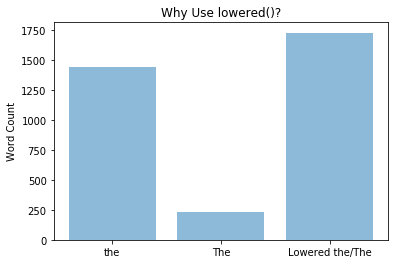

In [165]:
objects = ('the', 'The', 'Lowered the/The')
y_pos = np.arange(len(objects))
performance = [fdist1['the'], fdist1['The'], fdist1_lowered['the']]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Word Count')
plt.title('Why Use lowered()?')
 
plt.show()

If we want to treat "the" and "The" as the same word, which we do, then we need to apply the lowered() function to all of our texts. 

In [211]:
counter = 0
graded_lowered = []
for i in graded:
    graded_lowered.append([w.lower() for w in tokens[counter]])
    counter += 1

Now that we have normalized the texts in terms of distinctions between uppercase and lowercase, let's see how the texts compare.

In [167]:
print("The Beacon Second Reader - Regular")
print("Lexical Diveristy score: ", lexical_diversity(graded[11]) * 100)
print("Vocabulary Size: ", len(set(graded[11])))
print("=============================")
print("")
print("The Beacon Second Reader - Lowered")
print("Lexical Diveristy score: ", lexical_diversity(graded_lowered[11]) * 100)
print("Vocabulary Size: ", len(set(graded_lowered[11])))
print("=============================")

The Beacon Second Reader - Regular
Lexical Diveristy score:  16.144852340168452
Vocabulary Size:  4543

The Beacon Second Reader - Lowered
Lexical Diveristy score:  14.556309748036533
Vocabulary Size:  4096


To see how a wider range of the texts have changed, lets look at the first 5 in our corpus.

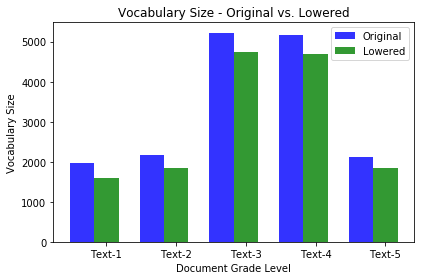

In [169]:
n_groups = 5
size_original = []
size_lowered = []
for i in range(5):
    size_original.append(len(set(graded[i])))
    size_lowered.append(len(set(graded_lowered[i])))
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, size_original, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Original')
 
rects2 = plt.bar(index + bar_width, size_lowered, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Lowered')
 
plt.xlabel('Document Grade Level')
plt.ylabel('Vocabulary Size')
plt.title('Vocabulary Size - Original vs. Lowered')
plt.xticks(index + bar_width, ('Text-1', 'Text-2', 'Text-3', 'Text-4', 'Text-5'))
plt.legend()
 
plt.tight_layout()
plt.show()

As expected, the lexical diversity scores and vocabulary sizes have dropped for all texts. There are many other methods for trimming down the token sets to be more truly unique (stemming, lemmanization, removal of stopwords, etc.) but for the purposes of this exercise, this method is sufficient.

To compare the texts we will be taking the ratio of each text's vocabulary size to the corpus' max vocabulary size.

In [183]:
counter = 0
vocab_lengths_lowered = []
for i in graded_lowered:
    vocab_lengths_lowered.append(len(set(graded_lowered[counter])))
    counter += 1

counter = 0
vocab_max = max(vocab_lengths_lowered)
print("Max vocab: "+str(vocab_max))
print("")
v_raw_score = []
for i in graded_lowered:
    print("Text-"+str(counter+1))
    print("Vocabulary Size: "+str(vocab_lengths_lowered[counter]))
    print("Vocabulary Raw Score: " + str(vocab_lengths_lowered[counter]/vocab_max))
    print("=============================")
    v_raw_score.append(vocab_lengths_lowered[counter]/vocab_max)
    counter +=1

Max vocab: 16493

Text-1
Vocabulary Size: 1604
Vocabulary Raw Score: 0.09725338022191232
Text-2
Vocabulary Size: 1852
Vocabulary Raw Score: 0.11229006245073668
Text-3
Vocabulary Size: 4741
Vocabulary Raw Score: 0.2874552840599042
Text-4
Vocabulary Size: 4698
Vocabulary Raw Score: 0.28484811738313226
Text-5
Vocabulary Size: 1834
Vocabulary Raw Score: 0.1111986903534833
Text-6
Vocabulary Size: 2505
Vocabulary Raw Score: 0.15188261686776208
Text-7
Vocabulary Size: 1167
Vocabulary Raw Score: 0.07075729097192748
Text-8
Vocabulary Size: 3105
Vocabulary Raw Score: 0.18826168677620808
Text-9
Vocabulary Size: 2847
Vocabulary Raw Score: 0.1726186867155763
Text-10
Vocabulary Size: 2656
Vocabulary Raw Score: 0.16103801612805432
Text-11
Vocabulary Size: 881
Vocabulary Raw Score: 0.053416600982234885
Text-12
Vocabulary Size: 4096
Vocabulary Raw Score: 0.24834778390832474
Text-13
Vocabulary Size: 4462
Vocabulary Raw Score: 0.2705390165524768
Text-14
Vocabulary Size: 8052
Vocabulary Raw Score: 0.48820

The table below shows how the method is implemented:

<table>
  <thead>
    <tr>
      <th>Document</th>
      <th>Vocabulary Length of Document</th>
      <th>Max Vocabulary Length in Corpus</th>
      <th>Document Vocab / Max Vocab</th>
      <th>v_raw_score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Text-1</td>
      <td>1,604</td>
      <td>16,493</td>
      <td>1,604 / 16,493</td>
      <th>0.09725</th>
    </tr>
    <tr>
      <td>Text-2</td>
      <td>1,852</td>
      <td>16,493</td>
      <td>1,852 / 16,493</td>
      <th>0.11229</th>
    </tr>
    <tr>
      <td>Text-3</td>
      <td>4,741</td>
      <td>16,493</td>
      <td>4,741 / 16,493</td>
      <th>0.28745</th>
    </tr>
  </tbody>
</table>


### <a name="Question-2"></a>Question-2

After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

The Bird-Klein text defines a "long" word as one that is longer than 15 characters in length. Before we begin our analysis, we first need to find all of these long words in our documents.

In [248]:
counter = 0
long_set = []
for i in graded_lowered:
    long_words = [w for w in set(graded_lowered[counter]) if len(w) > 15]
    long_set.append(long_words)
    counter += 1

In [250]:
# Number of long words in first 5 texts
for i in range(5):
    print("Number of long words in Text-"+str(i+1)+": "+str(len(long_set[i])))

Number of long words in Text-1: 6
Number of long words in Text-2: 7
Number of long words in Text-3: 11
Number of long words in Text-4: 11
Number of long words in Text-5: 9


Now that we have located the words that have a length greater than 15 characters, we will determine the long-word-score of each text using the same method as Question-1.

In [259]:
# Get list of lengths of long words
counter = 0
longWord_lengths = []
for i in long_set:
    longWord_lengths.append(len(set(long_set[counter])))
    counter += 1


counter = 0
longWord_max = max(longWord_lengths)
print("Max number of long-words: "+str(longWord_max))
print("")
v_longWord_score = []
for i in graded_lowered:
    print("Text-"+str(counter+1))
    print("Long-Word Size: "+str(longWord_lengths[counter]))
    print("Long-Word Score: " + str(longWord_lengths[counter]/longWord_max))
    print("=============================")
    v_longWord_score.append(longWord_lengths[counter]/longWord_max)
    counter +=1

Max number of long-words: 77

Text-1
Long-Word Size: 6
Long-Word Score: 0.07792207792207792
Text-2
Long-Word Size: 7
Long-Word Score: 0.09090909090909091
Text-3
Long-Word Size: 11
Long-Word Score: 0.14285714285714285
Text-4
Long-Word Size: 11
Long-Word Score: 0.14285714285714285
Text-5
Long-Word Size: 9
Long-Word Score: 0.11688311688311688
Text-6
Long-Word Size: 9
Long-Word Score: 0.11688311688311688
Text-7
Long-Word Size: 12
Long-Word Score: 0.15584415584415584
Text-8
Long-Word Size: 9
Long-Word Score: 0.11688311688311688
Text-9
Long-Word Size: 14
Long-Word Score: 0.18181818181818182
Text-10
Long-Word Size: 10
Long-Word Score: 0.12987012987012986
Text-11
Long-Word Size: 9
Long-Word Score: 0.11688311688311688
Text-12
Long-Word Size: 10
Long-Word Score: 0.12987012987012986
Text-13
Long-Word Size: 13
Long-Word Score: 0.16883116883116883
Text-14
Long-Word Size: 19
Long-Word Score: 0.24675324675324675
Text-15
Long-Word Size: 40
Long-Word Score: 0.5194805194805194
Text-16
Long-Word Size: 28

The below table shows how the method is calculated and the resulting long-word vocabulary score of each text:

<table>
  <thead>
    <tr>
      <th>Document</th>
      <th>Long Words in Document</th>
      <th>Max Long Words in Corpus</th>
      <th>Document Long Words / Max Long-Words</th>
      <th>Long-word Vocabulary Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Text 1</td>
      <td>6</td>
      <td>77</td>
      <td>6 / 77</td>
      <th>0.0779</th>
    </tr>
    <tr>
      <td>Text 2</td>
      <td>7</td>
      <td>77</td>
      <td>7 / 77</td>
      <th>0.0909</th>
    </tr>
    <tr>
      <td>Text 3</td>
      <td>11</td>
      <td>77</td>
      <td>11 / 77</td>
      <th>0.1429</th>
    </tr>
  </tbody>
</table>

### <a name="Question-3"></a>Question-3

Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

In [269]:
counter = 0
for i in graded_lowered:
    print("Text-"+str(counter+1))
    v_size = vocab_lengths_lowered[counter]
    print("Vocabulary Size: "+str(v_size))
    v_raw_score = vocab_lengths_lowered[counter]/vocab_max
    print("Vocabulary Raw Score: " + str(v_raw_score))
    v_score_sqrt = math.sqrt(vocab_lengths_lowered[counter]/vocab_max)
    print("Vocabulary Score Square Root: " + str(v_score_sqrt))
    v_longWord_score = longWord_lengths[counter]/longWord_max
    print("Vocabulary Long Word Score: " + str(v_longWord_score))
    v_final_score = np.mean([v_raw_score, v_score_sqrt, v_longWord_score])
    print("Text Difficulty Score: " + str(v_final_score))
    print("=============================")
    counter += 1
    

Text-1
Vocabulary Size: 1604
Vocabulary Raw Score: 0.09725338022191232
Vocabulary Score Square Root: 0.3118547421828187
Vocabulary Long Word Score: 0.07792207792207792
Text Difficulty Score: 0.162343400109
Text-2
Vocabulary Size: 1852
Vocabulary Raw Score: 0.11229006245073668
Vocabulary Score Square Root: 0.3350970940648944
Vocabulary Long Word Score: 0.09090909090909091
Text Difficulty Score: 0.179432082475
Text-3
Vocabulary Size: 4741
Vocabulary Raw Score: 0.2874552840599042
Vocabulary Score Square Root: 0.5361485652875556
Vocabulary Long Word Score: 0.14285714285714285
Text Difficulty Score: 0.322153664068
Text-4
Vocabulary Size: 4698
Vocabulary Raw Score: 0.28484811738313226
Vocabulary Score Square Root: 0.5337116425403631
Vocabulary Long Word Score: 0.14285714285714285
Text Difficulty Score: 0.320472300927
Text-5
Vocabulary Size: 1834
Vocabulary Raw Score: 0.1111986903534833
Vocabulary Score Square Root: 0.3334646763204212
Vocabulary Long Word Score: 0.11688311688311688
Text Diffi

In [279]:
# Build dataframe for results
scores = pd.DataFrame(
    {"Text": [], "v_size": [], "v_raw_score": [], "v_score_sqrt": [], "v_longWord_score": [], "v_final_score": []}
)
counter = 0
for i in graded_lowered:
    text = "Text-"+str(counter+1)
    v_size = vocab_lengths_lowered[counter]
    v_raw_score = vocab_lengths_lowered[counter]/vocab_max
    v_score_sqrt = math.sqrt(vocab_lengths_lowered[counter]/vocab_max)
    v_longWord_score = longWord_lengths[counter]/longWord_max
    v_final_score = np.mean([v_raw_score, v_score_sqrt, v_longWord_score])
    scores = scores.append({"Text": text, 
                            "v_size": v_size, 
                            "v_raw_score": v_raw_score, 
                            "v_score_sqrt": v_score_sqrt, 
                            "v_longWord_score": v_longWord_score, 
                            "v_final_score": v_final_score}, ignore_index=True)
    counter += 1
    

The table below shows the scores as well as the text difficulty score (v_final_score).

In [286]:
# Output dataframe results
cols = ['Text', 'v_size', 'v_raw_score', 'v_score_sqrt', 'v_longWord_score', 'v_final_score']
scores = scores[cols]
scores

,Text,v_size,v_raw_score,v_score_sqrt,v_longWord_score,v_final_score
0,Text-1,1604.0,0.097253,0.311855,0.077922,0.162343
1,Text-2,1852.0,0.112290,0.335097,0.090909,0.179432
2,Text-3,4741.0,0.287455,0.536149,0.142857,0.322154
3,Text-4,4698.0,0.284848,0.533712,0.142857,0.320472
4,Text-5,1834.0,0.111199,0.333465,0.116883,0.187182
5,Text-6,2505.0,0.151883,0.389721,0.116883,0.219496
6,Text-7,1167.0,0.070757,0.266002,0.155844,0.164201
7,Text-8,3105.0,0.188262,0.433891,0.116883,0.246345
8,Text-9,2847.0,0.172619,0.415474,0.181818,0.256637
9,Text-10,2656.0,0.161038,0.401295,0.129870,0.230735


(Note: The below analysis discusses only the differences as they apply to the "same graded texts used in homework 1")

The equally-weighted average shows a much different picture of the three texts than the lexical diversity score alone. The 2nd grade level text fell from the top spot to the bottom thanks to its low scores in both normalized vocabulary and long-word vocabulary. The 7th grade level text's score was greatly helped in large part due to its high long-word vocabulary score which probably distorted the rankings a bit, but due to the equal-weighting constraint of the assignment a bias like this would be expected. 

It is obvious from the scores that normalizing a text has a great impact on how we view the difficulty of a document. By setting an equal baseline for how we compare one text to another, we remove (though only slightly) the bias that overall document length has on the different scoring methods, such as lexical diversity. To improve these scores even further, future work would include further clean-up of underlying data (removing extraneous words such as urls), additional steps in normalizing text (stemming, lemmanization, etc.), adding a library to determine at what age a word is introduced into the lexicon, and a different weighting approach to remove bias.